# TP4 : Problème aux moindres carrés

L'objectif de ce TP consiste à reconstruire des images préalablement modifiées par une transformation non linéaire bruitée.

<img src="exo2.png" width="800" height="600"  >


Soit $I$ une image de taille $n\times m$.
Une transformation non linéaire notée $T$ est réalisée sur chaque niveau de gris $I_{ij}$ du pixel $(i,j)$ de l'image $I$. L'image modifiée après transformation est notée $J$, dont les éléments sont définis par :
\begin{equation}
\forall i\in \{1,..,n\}, \forall j \in\{1,..,m\}, \qquad J_{ij}=T(\alpha,\beta,I_{ij})=e^{-\alpha I_{ij}+\beta}
\end{equation}
où $(\alpha,\beta)$ sont des paramètres réels.


On dispose d'une partie  de l'image modifiée par la transformation $T$ avec un bruit additif aléatoire et de la partie de l'image originale correspondante.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import jax.numpy as jnp

### Question 1 : 
Ecrivez et résolvez la formulation matricielle du problème aux moindres carrés ordinaires (MCO) permettant d'estimer les paramètres $(\alpha,\beta)$ de la fonction $T$.

S(alpha, beta) = sum(j)sum(i) (Jij - T(alpha, beta, Iij))^2

### Question 2 :
Codez la résolution du problème aux moindres carrés ordinaires à partir des données *Data.mat* et *DataMod.mat* issus respectivement des images originales et modifiées. 

On pourra utiliser la fonction python **np.linalg.pinv** 

(50, 50)


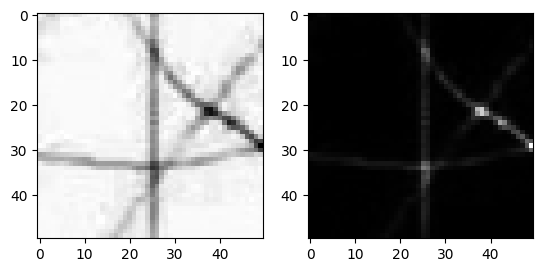

In [3]:
Data = sio.loadmat('Data.mat') # une partie de l'image originale
DataMod = sio.loadmat('DataMod.mat') # cette même partie de l'image modifée par la transformation T avec bruit additif

Data=np.asarray(Data['Data'])
DataMod=np.asarray(DataMod['DataMod'])
print(Data.shape) # dimension de la partie commune image originale et modifiée

fig = plt.figure(12)
ax1 = plt.subplot(1, 2, 1)
plt.imshow(Data, cmap='gray')
ax2=plt.subplot(1, 2, 2)
plt.imshow(DataMod, cmap='gray')

In [5]:
Data.shape

(50, 50)

In [6]:
DataMod.shape

(50, 50)

### Question 3 :
Déduire de la question 1 la fonction à appliquer pour reconstruire l'image.

In [9]:
X = jnp.vstack((-Data.flatten(), jnp.ones(Data.size))).T

In [11]:
Y = DataMod.flatten()

In [13]:
Y_log = jnp.log(Y)

In [14]:
theta = jnp.linalg.lstsq(X, Y_log, rcond=None)[0]

In [17]:
other_theta = jnp.linalg.pinv(X) @ Y_log

In [15]:
theta

Array([ 4.9998746 , -0.01029276], dtype=float32)

In [18]:
other_theta

Array([ 4.999872 , -0.0102969], dtype=float32)

In [20]:
alpha = theta[0]
beta = theta[1]

### Question 4 :
A partir des paramètres estimés et de l'image entière modifiée *ImMod.mat*, codez la reconstruction de l'image originale.

(493, 718)


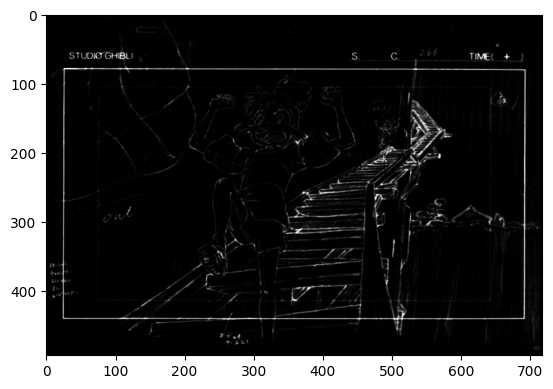

In [19]:
ImMod = sio.loadmat('ImMod.mat') # image entière modifiée
ImMod=np.asarray(ImMod['ImMod'])
print(ImMod.shape) # dimension de l'image entière

plt.imshow(ImMod,cmap='gray')

In [23]:
ImOrig = -1 / alpha * (jnp.log(ImMod) - beta)

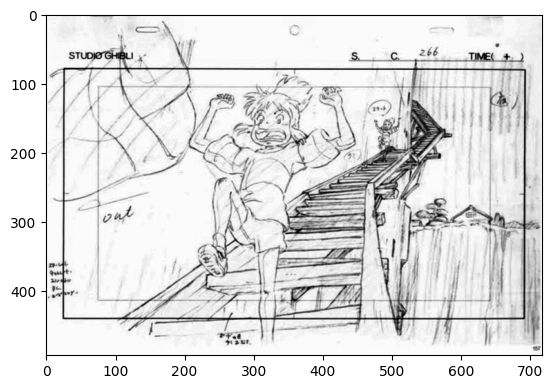

In [24]:
plt.imshow(ImOrig,cmap='gray')

# Quizz Studio Ghibli 

D'autres images à reconstruire vous sont proposées. 

Créez une fonction des étapes précédentes pour reconstruire l'image et testez vos connaissances sur les films de Hayao Miyazaki et Isao Takahata.


In [27]:
def fix_image(path_norm: str, path_mod: str, path_fix: str):
    Data = jnp.asarray(sio.loadmat(path_norm)['Data'])
    DataMod = jnp.asarray(sio.loadmat(path_mod)['DataMod'])

    X = jnp.vstack((-Data.flatten(), jnp.ones(Data.size))).T
    Y = DataMod.flatten()
    Y_log = jnp.log(Y)

    theta = jnp.linalg.pinv(X) @ Y_log
    alpha = theta[0]
    beta = theta[1]

    ImMod = jnp.asarray(sio.loadmat(path_fix)['ImMod'])
    return -1 / alpha * (jnp.log(ImMod) - beta)


In [29]:
fixed_SG2 = fix_image('QuizzStudioGhibli/SG2/DataSG2.mat', 'QuizzStudioGhibli/SG2/DataSG2Mod.mat', 'QuizzStudioGhibli/SG2/ImModSG2.mat')

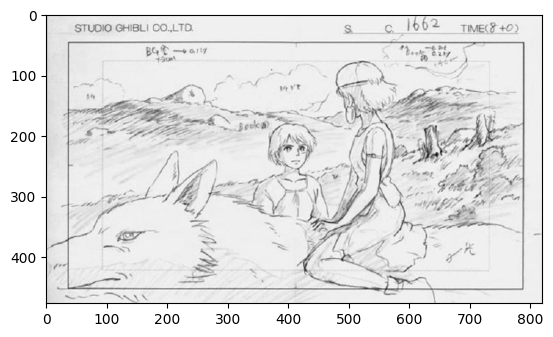

In [30]:
plt.imshow(fixed_SG2, cmap='gray')

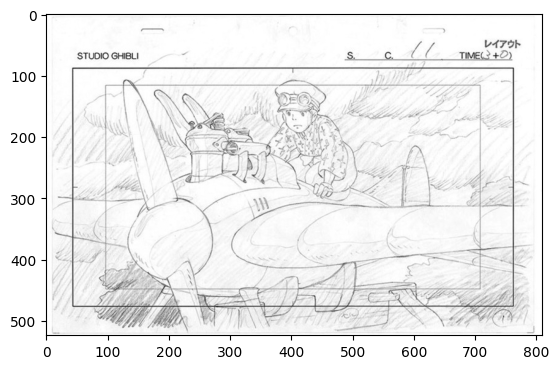

In [31]:
plt.imshow(fix_image('QuizzStudioGhibli/SG3/DataSG3.mat', 'QuizzStudioGhibli/SG3/DataSG3Mod.mat', 'QuizzStudioGhibli/SG3/ImModSG3.mat'), cmap='gray')

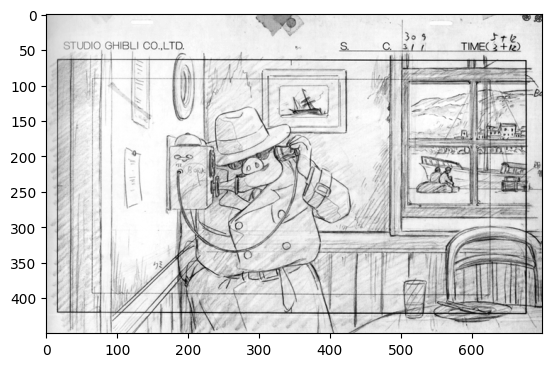

In [32]:
plt.imshow(fix_image('QuizzStudioGhibli/SG4/DataSG4.mat', 'QuizzStudioGhibli/SG4/DataSG4Mod.mat', 'QuizzStudioGhibli/SG4/ImModSG4.mat'), cmap='gray')

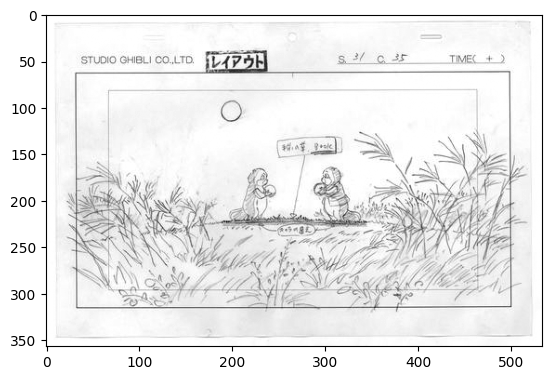

In [33]:
plt.imshow(fix_image('QuizzStudioGhibli/SG5/DataSG5.mat', 'QuizzStudioGhibli/SG5/DataSG5Mod.mat', 'QuizzStudioGhibli/SG5/ImModSG5.mat'), cmap='gray')

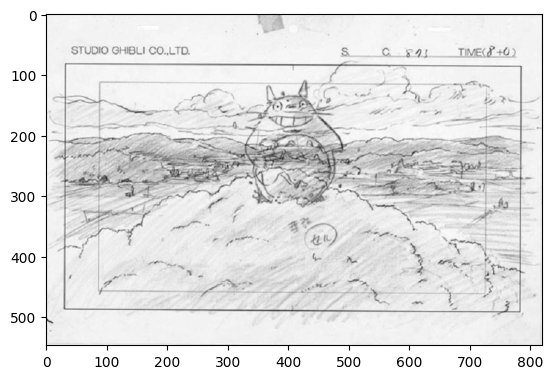

In [34]:
plt.imshow(fix_image('QuizzStudioGhibli/SG6/DataSG6.mat', 'QuizzStudioGhibli/SG6/DataSG6Mod.mat', 'QuizzStudioGhibli/SG6/ImModSG6.mat'), cmap='gray')